<a href="https://colab.research.google.com/github/Dhruv-cs50/CS133_sp25_datafiles/blob/main/Colab_A5_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [25]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [26]:
import pandas as pd

# Load the TSV file into a DataFrame
tsv_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
euk_df = pd.read_csv(tsv_url, sep="\t")

# Strip whitespace from column names
euk_df.columns = euk_df.columns.str.strip()

# Display the cleaned column names
print(euk_df.columns)

# Replace non-numeric values in 'Number of genes' with NaN and convert to float
euk_df['Number of genes'] = pd.to_numeric(euk_df['Number of genes'].replace('-', 'NaN'), errors='coerce')

# Filter the DataFrame to include only mammals with at least 20,000 genes
mammals_with_genes = euk_df[(euk_df['Class'].str.strip() == 'Mammalia') & (euk_df['Number of genes'] >= 20000)]

# Count the number of mammals meeting the criteria
num_mammals = len(mammals_with_genes)

# Get the scientific names of these mammals
scientific_names = mammals_with_genes['Species'].tolist()

print(f"Number of mammals with at least 20,000 genes: {num_mammals}")
print("Scientific names of these mammals:")
for name in scientific_names:
    print(name)


Index(['Species', 'Kingdom', 'Class', 'Size (Mb)', 'GC%', 'Number of genes',
       'Number of proteins', 'Publication year', 'Assembly status'],
      dtype='object')
Number of mammals with at least 20,000 genes: 0
Scientific names of these mammals:


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [22]:
# Your code here . . .
animals = euk_df[euk_df['Kingdom'] == 'Animalia']

# Group by 'Class' and count the number of records in each class
class_counts = animals.groupby('Class').size()

print(class_counts)

Series([], dtype: int64)


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [27]:
euk_df.columns = euk_df.columns.str.strip()

# Filter the DataFrame for entries where the 'Kingdom' is 'Animalia'
animals = euk_df[euk_df['Kingdom'].str.strip() == 'Animalia']

# Group by 'Class' and count unique 'Species'
unique_species_per_class = animals.groupby('Class')['Species'].nunique()

print("Number of unique species per class within the animal kingdom:")
print(unique_species_per_class)


Number of unique species per class within the animal kingdom:
Series([], Name: Species, dtype: int64)


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [28]:
euk_df.columns = euk_df.columns.str.strip()

# Filter the DataFrame to include only mammals
mammals = euk_df[euk_df['Class'].str.strip() == 'Mammalia']

# Find unique species where the genus is 'Macaca'
macaca_species = mammals[mammals['Species'].str.startswith('Macaca')]['Species'].unique()

print("Unique scientific names of mammals with the genus 'Macaca':")
for species in macaca_species:
    print(species)

Unique scientific names of mammals with the genus 'Macaca':


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [29]:
# Your code here . . .
euk_df.columns = euk_df.columns.str.strip()

# Split the 'Species' column and keep only the first two parts
euk_df['Species_simplified'] = euk_df['Species'].str.split().str[0:2].str.join(" ")

# Select the columns needed for the new DataFrame
df_species = euk_df[['Kingdom', 'Class', 'Size (Mb)', 'Number of genes', 'Number of proteins', 'Species_simplified']]

# Rename the simplified species column back to 'Species' for consistency
df_species.rename(columns={'Species_simplified': 'Species'}, inplace=True)

# Display the new DataFrame
print(df_species.head())

    Kingdom           Class  Size (Mb)  Number of genes Number of proteins  \
0  Protists  Other Protists    167.676          38549.0              38554   
1    Plants     Land Plants    119.669          38311.0              48265   
2    Plants     Land Plants    979.046          59847.0              71219   
3    Plants     Land Plants    412.924          37603.0              41939   
4    Plants     Land Plants    828.349          31200.0              37660   

                Species  
0     Emiliania huxleyi  
1  Arabidopsis thaliana  
2           Glycine max  
3   Medicago truncatula  
4  Solanum lycopersicum  


<ipython-input-29-ad1a4dbc5c1d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_species.rename(columns={'Species_simplified': 'Species'}, inplace=True)


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

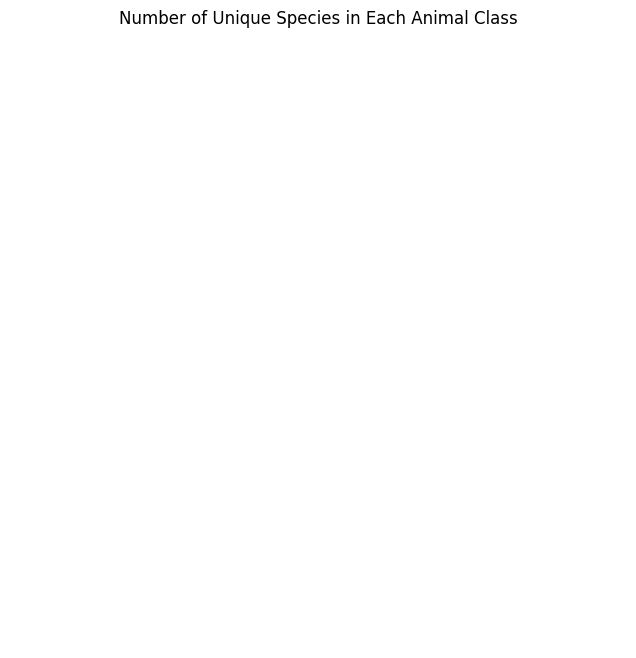

In [30]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df_species' has already been created as described in the previous question

# Filter the DataFrame for entries where the Kingdom is 'Animalia'
animal_df = df_species[df_species['Kingdom'] == 'Animalia']

# Group by 'Class' and count unique 'Species'
unique_species_per_class = animal_df.groupby('Class')['Species'].nunique()

# Create a DataFrame for the pie plot
df_pie = pd.DataFrame({'Unique Species': unique_species_per_class})
df_pie.index.name = 'Class'

# Plotting
plt.figure(figsize=(10, 8))
df_pie['Unique Species'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Unique Species in Each Animal Class')
plt.ylabel('')  # Remove the y-label as it's not necessary for pie charts
plt.show()


In [ ]:
# Create a panda pie plot using the dataframe above

# Your code here . . .